In [1]:
#test to see if we can actually load in the data ourselves and get something out of it
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
#img = nib.load('train_1.nii')
#img.shape;

In [2]:
import matplotlib.pyplot as plt
from IPython.display import *


def displayPlot(plt):
    plt.savefig("temp_plot.png")
    display(Image(filename='temp_plot.png'))



In [72]:
#Read the processed data provided by Caifa and put it in dataMatrix[i][j]. i ranges from 0 to 6 and denotes
# mean, variance, standard variance, median, skewness, kurtosis and finally age. j are the different samples
from numpy import genfromtxt
dataMatrix = genfromtxt('feature extraction\cluster_1_org.csv', delimiter=',')
len(dataMatrix);

In [5]:
def scatterPlot(data_x, data_y):
    fig1 = plt.figure()
    
    ax = [fig1.add_subplot(111)] 
    property_name = ['mean', 'variance' , 'standard variance', 'median', 'skewness', 'kurtosis']
    x = data_x
    y = data_y
    
    ax[0].scatter(x,y,color='blue',s=5,edgecolor='none')
    ax[0].set_aspect(1./ax[0].get_data_ratio() )
    ax[0].set_ylabel('Brain Age')
    ax[0].set_xlabel(property_name[0])
    
    displayPlot(fig1)

In [6]:
#Here we will write a function that will plot the statistical properties of dataMatrix against the age.
fig = plt.figure()
ax = [fig.add_subplot(int('23' + str(i+1))) for i in range(0, len(dataMatrix) - 1)]
property_name = ['mean', 'variance' , 'standard variance', 'median', 'skewness', 'kurtosis']

## define the x and y axis of the plots. y is always the age of the brain.
x = [dataMatrix[i] for i in range(0, len(dataMatrix) - 1)]
y = dataMatrix[6]

## left panel
for i in range(0, len(dataMatrix) - 1):       
    ax[i].scatter(x[i],y,color='blue',s=5,edgecolor='none')
    ax[i].set_aspect(1./ax[i].get_data_ratio() )
    ax[i].set_ylabel('Brain Age')
    ax[i].set_xlabel(property_name[i])
        
    
fig.tight_layout()
#displayPlot(fig)
#fig.show()

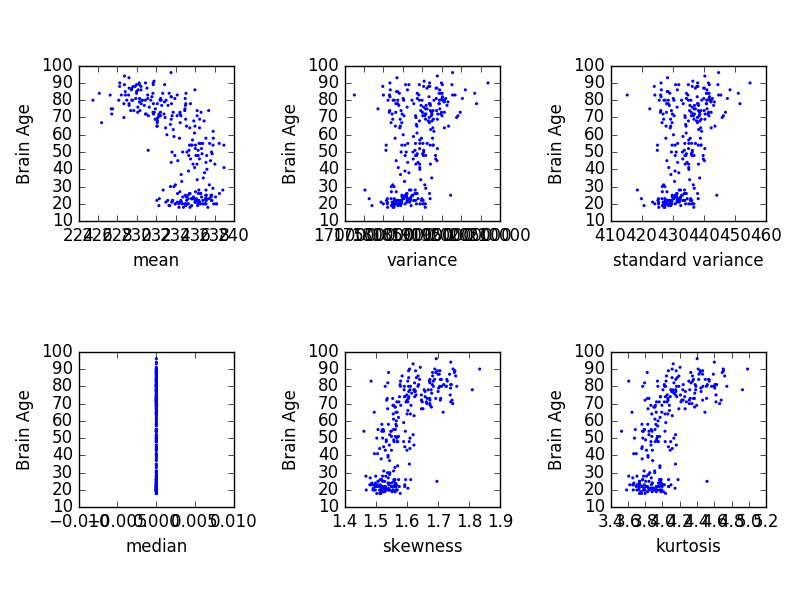

In [7]:
#Show the scatterplots

displayPlot(fig)

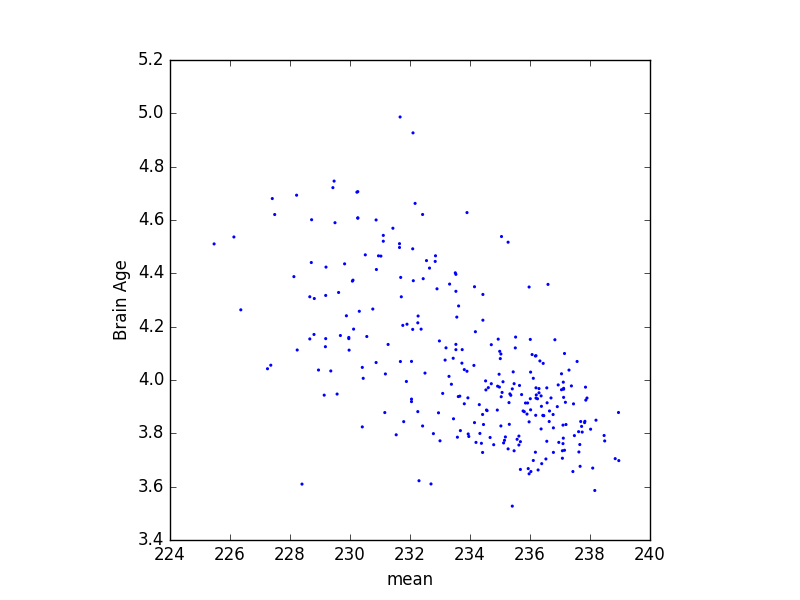

In [8]:
#We have seen how the different statistical properties relate to the Brain age. We can now proceed to pick several properties 
#The mean, skewness and Kurtosis look good, but we have a suspicion that kurtosis and skewness could be highly correlated. 
#Lets first find out if the skewness and kurtosis are independent.

scatterPlot(list(dataMatrix[0]), list(dataMatrix[5]))
#list(dataMatrix[1])

#we find that 4 and 5 are correlated too much. Using mean and skewness however seems to work fine for us.

In [102]:
from sklearn import datasets, linear_model
features = [[dataMatrix[0][i], dataMatrix[4][i] ] for i in range(0,len(dataMatrix[4]))   ]
label = dataMatrix[6]
regr = linear_model.LinearRegression()
regr.fit(features , label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
testdataMatrix = genfromtxt('feature extraction\cluster_1_test_org.csv', delimiter=',')
testData = [[testdataMatrix[0][i], testdataMatrix[4][i] ] for i in range(0,len(testdataMatrix[4]))   ];
ans = regr.predict(testData)

In [104]:
import csv
c = csv.writer(open("submissionjurre.csv", "wb"))
c.writerow(['ID' , 'Prediction'])
for i in range(0, len(ans)):
    c.writerow([i+1 , ans[i]])


In [97]:
#now try it for all parameters

features2 = [[dataMatrix[0][i],dataMatrix[1][i],dataMatrix[2][i],dataMatrix[3][i], dataMatrix[4][i],dataMatrix[5][i] ] for i in range(0,len(dataMatrix[4]))   ]
label2 = dataMatrix[6]
regr2 = linear_model.LinearRegression()
regr2.fit(features2 , label2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
testdataMatrix = genfromtxt('feature extraction\cluster_1_test_org.csv', delimiter=',')
testData2 = [[testdataMatrix[0][i], testdataMatrix[1][i], testdataMatrix[2][i], testdataMatrix[3][i], testdataMatrix[4][i], testdataMatrix[5][i] ] for i in range(0,len(testdataMatrix[4]))   ];
ans2 = regr2.predict(testData2)

In [100]:
import csv
c = csv.writer(open("submissionjurre2.csv", "wb"))
c.writerow(['ID' , 'Prediction'])
for i in range(0, len(ans2)):
    c.writerow([i+1 , ans2[i]])

In [106]:
#Lets try something nonlinear with the two features
features = [[dataMatrix[0][i], dataMatrix[4][i] ] for i in range(0,len(dataMatrix[4]))   ]
label = dataMatrix[6]


regr = np.polyffit(features, label, 2, cov = True)
#regr.fit(features , label)


#numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)[source]

TypeError: expected 1D vector for x

In [116]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
x = [1.2, 1.3, 1.6, 2.5, 2.3, 2.8]
y = [167.0, 180.3, 177.8,160.4,179.6, 154.3]
z = [-0.3, -0.8, -0.75, -1.21, -1.65, -0.68]
data = np.c_[x,y,z]

#mean = np.array([0.0,0.0,0.0])
#cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
#data = np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX = X.flatten()
YY = Y.flatten()

order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

TypeError: 'numpy.ndarray' object is not callable

In [117]:
features

[[233.94, 1.5125],
 [234.97999999999999, 1.5581],
 [235.91999999999999, 1.5571999999999999],
 [233.31999999999999, 1.6741999999999999],
 [235.90000000000001, 1.5422],
 [233.53, 1.6752],
 [229.13999999999999, 1.5799000000000001],
 [237.84999999999999, 1.5733999999999999],
 [227.41, 1.7455000000000001],
 [236.00999999999999, 1.6203000000000001],
 [236.63999999999999, 1.5450999999999999],
 [235.27000000000001, 1.6969000000000001],
 [233.38, 1.5616000000000001],
 [228.66, 1.6739999999999999],
 [234.18000000000001, 1.6128],
 [231.11000000000001, 1.7302],
 [228.40000000000001, 1.4853000000000001],
 [231.65000000000001, 1.7091000000000001],
 [236.78, 1.5299],
 [234.41999999999999, 1.4921],
 [233.81, 1.5454000000000001],
 [233.44999999999999, 1.538],
 [235.47, 1.5033000000000001],
 [236.91, 1.5632999999999999],
 [234.71000000000001, 1.5638000000000001],
 [233.68000000000001, 1.5222],
 [235.97, 1.4953000000000001],
 [229.47, 1.7606999999999999],
 [232.94999999999999, 1.5565],
 [238.09, 1.4875],

In [125]:
import numpy as np
from scipy.optimize import curve_fit
def func(x, z , a, b, c):
    return a + b* x + c * x**2 + z

xdata = np.linspace(0, 4, 50)
zdata = np.linspace(0, 5, 100)
y = func(xdata, zdata , 2.5, 1.3, 0.5)
#ydata = y + 0.2 * np.random.normal(size=len(xdata))

#popt, pcov = curve_fit(func, xdata, ydata)

ValueError: operands could not be broadcast together with shapes (50,) (100,) 

In [123]:
popt

array([ 2.52007368,  1.29817463,  0.49920918])

In [161]:
import numpy as np
from scipy.optimize import curve_fit

def func(X, a, b, c, d, e, f):
    x,y = X
    return a * x + b * y  + c + d * x**2 + e * y**2 + f * x * y

# some artificially noisy data to fit
x = dataMatrix[0]
y = dataMatrix[4]
#a, b, c = 0.1, 40., 1.
z = dataMatrix[6]

# initial guesses for a,b,c:
p0 = 0.1, 40., 1., 1, 1, 1
nonlinFit = curve_fit(func, (x,y), z, p0)

In [172]:
import csv
c = csv.writer(open("submissionjurre.csv", "wb"))
c.writerow(['ID' , 'Prediction'])
for i in range(0, len(ans)):
    c.writerow([i+1 , func(testData[i], nonlinFit[0][0], nonlinFit[0][1],nonlinFit[0][2], nonlinFit[0][3], nonlinFit[0][4], nonlinFit[0][5] )])
#func([1,2], nonlinFit[0][0], nonlinFit[0][1],nonlinFit[0][2], nonlinFit[0][3], nonlinFit[0][4], nonlinFit[0][5] )


In [151]:
dataMatrix[0];

In [170]:
testData[0]

[231.11000000000001, 1.5343]